# **Titanic Survival Analysis**

In [1]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")


## **Q1: UPLOADING DATASET IN TO PYTHON ENVIRONMENT**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving titanic_dataset.csv to titanic_dataset.csv


In [31]:
import io
df = pd.read_csv(io.BytesIO(uploaded['titanic_dataset.csv']))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Q2. MAKE PASSENGER ID AS INDEX COLOUMN**

In [32]:
df.set_index('PassengerId',inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Q3: FIND THE BASIC PARAMETERS OF DATASET**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Q4. ANALYSING MISSING VALUES**

In [9]:
df['Age'].fillna(round(df['Age'].mean(),1),inplace=True)
df["Cabin"].fillna(value='Not Known',inplace=True)
df["Embarked"].fillna(df["Embarked"].mode(),inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Not Known,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Not Known,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Not Known,S


### **Q:5 CHECKING OUTLIERS USING BOXPLOT**

Text(0.5, 1.0, 'box plot of Fare')

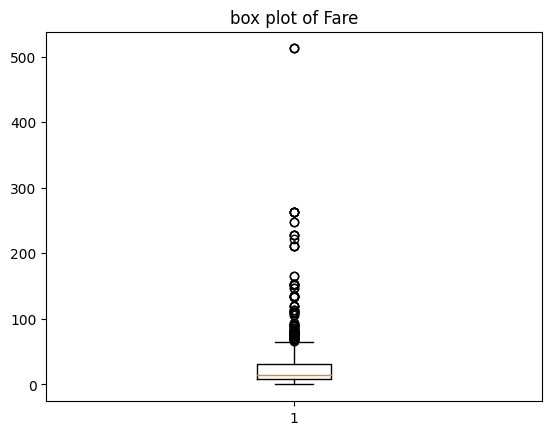

In [10]:
import numpy as np
plt.boxplot(df['Fare'])
plt.title('box plot of Fare')

In [11]:
Q1=np.percentile(df['Fare'],25,interpolation='midpoint')
Q2=np.percentile(df['Fare'],50,interpolation='midpoint')
Q3=np.percentile(df['Fare'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR
print(low_lim)
print(upp_lim)

-26.724
65.6344


<ipython-input-11-b23871fbe3c8>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(df['Fare'],25,interpolation='midpoint')
<ipython-input-11-b23871fbe3c8>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(df['Fare'],50,interpolation='midpoint')
<ipython-input-11-b23871fbe3c8>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3=np.percentile(df['Fare'],

In [12]:
outlier=[]
for x in df['Fare']:
    if((x>upp_lim) or (x<low_lim)):
        outlier.append(x)
df['Fare']=np.where(df['Fare']>upp_lim,upp_lim,np.where(df['Fare']<low_lim,low_lim,df['Fare']))
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Not Known,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Not Known,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Not Known,S


Text(0.5, 1.0, 'box plot of Fare')

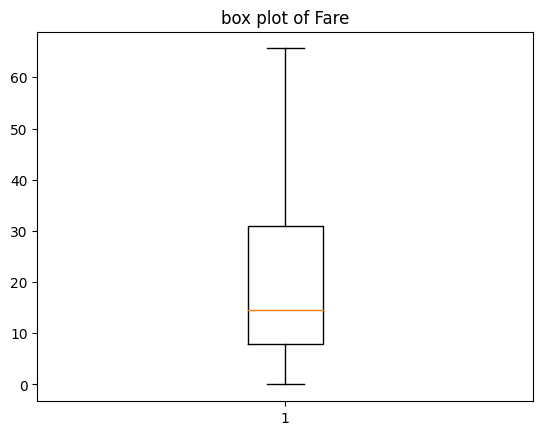

In [13]:
plt.boxplot(df['Fare'])
plt.title('box plot of Fare')

Text(0.5, 1.0, 'box plot of Age')

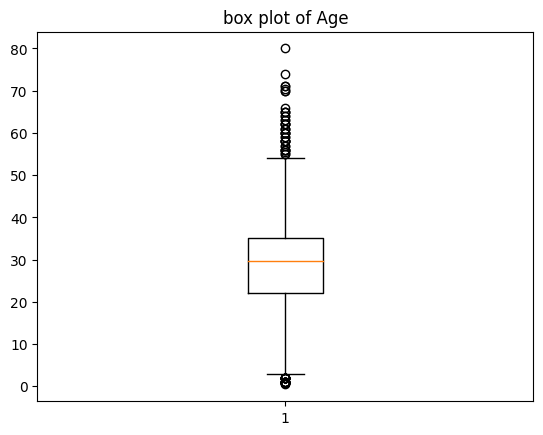

In [14]:
plt.boxplot(df['Age'])
plt.title('box plot of Age')

In [15]:
Q1=np.percentile(df['Age'],25,interpolation='midpoint')
Q2=np.percentile(df['Age'],50,interpolation='midpoint')
Q3=np.percentile(df['Age'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR
print(low_lim)
print(upp_lim)

2.5
54.5


<ipython-input-15-87f9ec32b3c3>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(df['Age'],25,interpolation='midpoint')
<ipython-input-15-87f9ec32b3c3>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(df['Age'],50,interpolation='midpoint')
<ipython-input-15-87f9ec32b3c3>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3=np.percentile(df['Age'],75,

In [16]:
outlier=[]
for x in df['Age']:
    if((x>upp_lim) or (x<low_lim)):
        outlier.append(x)
df['Age']=np.where(df['Age']>upp_lim,upp_lim,np.where(df['Age']<low_lim,low_lim,df['Age']))
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Not Known,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Not Known,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Not Known,S


Text(0.5, 1.0, 'box plot of Age')

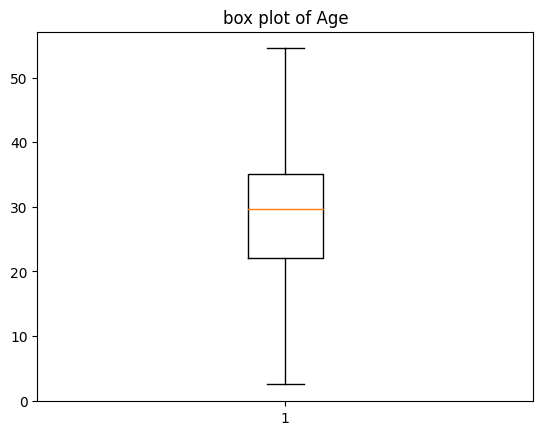

In [17]:
plt.boxplot(df['Age'])
plt.title('box plot of Age')

In [18]:
Q1=np.percentile(df['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(df['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(df['SibSp'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR
print(low_lim)
print(upp_lim)

-1.5
2.5


<ipython-input-18-8ba868e85bca>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(df['SibSp'],25,interpolation='midpoint')
<ipython-input-18-8ba868e85bca>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(df['SibSp'],50,interpolation='midpoint')
<ipython-input-18-8ba868e85bca>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3=np.percentile(df['SibSp

In [19]:
outlier=[]
for x in df['Age']:
    if((x>upp_lim) or (x<low_lim)):
        outlier.append(x)
df['SibSp']=np.where(df['SibSp']>upp_lim,upp_lim,np.where(df['SibSp']<low_lim,low_lim,df['SibSp']))
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,Not Known,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,65.6344,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,Not Known,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,Not Known,S


Text(0.5, 1.0, 'box plot of SibSp')

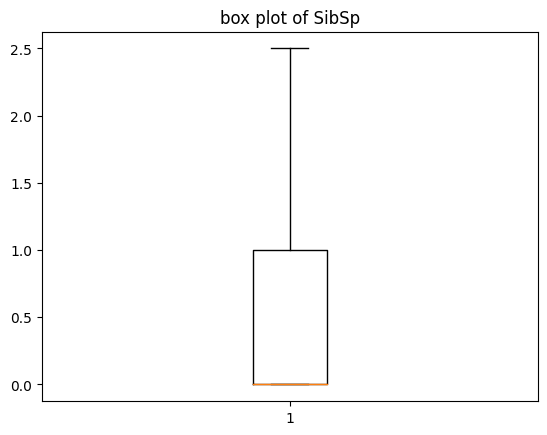

In [20]:

plt.boxplot(df['SibSp'])
plt.title('box plot of SibSp')

**Q:6 Do min max scaling on the feature set (Take ‘Survived’ as target)**

In [21]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Survived :
 female    233
male      109
Name: Sex, dtype: int64
Dead:
 male      468
female     81
Name: Sex, dtype: int64


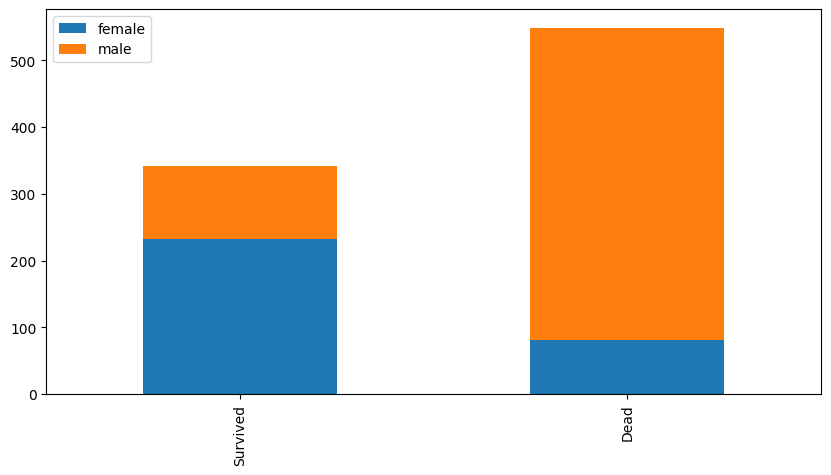

In [22]:
def bar_chart(feature):
    survived = df[df['Survived']==1][feature].value_counts()
    dead = df[df['Survived']==0][feature].value_counts()
    count = pd.DataFrame([survived,dead])
    count.index = ['Survived','Dead']
    count.plot(kind='bar',stacked=True, figsize=(10,5))
bar_chart('Sex')
print("Survived :\n",df[df['Survived']==1]['Sex'].value_counts())
print("Dead:\n",df[df['Survived']==0]['Sex'].value_counts())

INSIGHT: Women more likely survived than Men.

Survived :
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Dead:
 3    372
2     97
1     80
Name: Pclass, dtype: int64


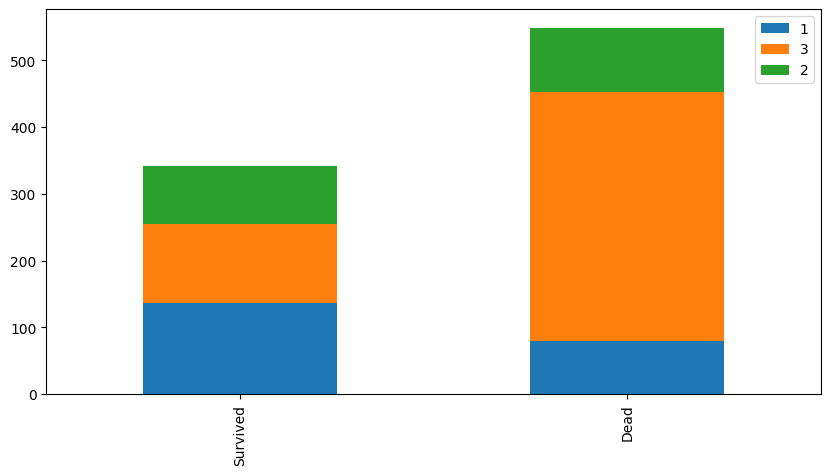

In [23]:
bar_chart('Pclass')
print("Survived :\n",df[df['Survived']==1]['Pclass'].value_counts())
print("Dead:\n",df[df['Survived']==0]['Pclass'].value_counts())

**Insight :  1st class more likely survivied than other classes.
          3rd class more likely dead than other classes **

Survived :
 0.0    210
1.0    112
2.0     13
2.5      7
Name: SibSp, dtype: int64
Dead:
 0.0    398
1.0     97
2.5     39
2.0     15
Name: SibSp, dtype: int64


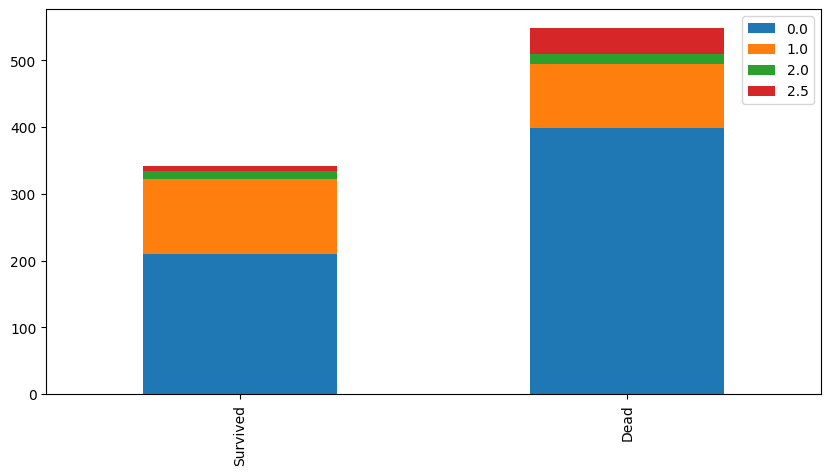

In [24]:
bar_chart('SibSp')
print("Survived :\n",df[df['Survived']==1]['SibSp'].value_counts())
print("Dead:\n",df[df['Survived']==0]['SibSp'].value_counts())

**Insight: person aboarded with more than 2 siblings or spouse more likely survived.**
**A person aboarded without siblings or spouse more likely dead **

Survived :
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
Dead:
 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


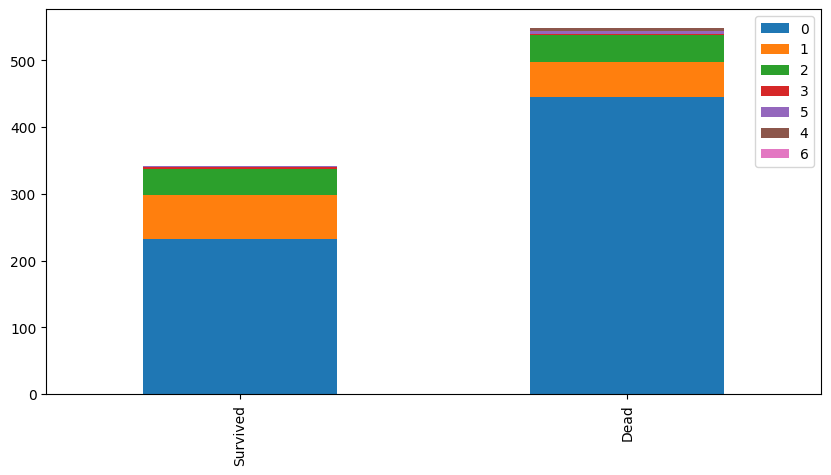

In [25]:
bar_chart('Parch')
print("Survived :\n",df[df['Survived']==1]['Parch'].value_counts())
print("Dead:\n",df[df['Survived']==0]['Parch'].value_counts())

**A person aboarded with more than 2 parents or children more likely survived.**
**Aperson aboarded alone more likely dead**

In [26]:
x=df.drop(['Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)
df= pd.get_dummies(df)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_Not Known,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1.0,0,7.2500,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1,1,38.0,1.0,0,65.6344,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,3,26.0,0.0,0,7.9250,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,1,35.0,1.0,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,3,35.0,0.0,0,8.0500,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [27]:
y=df['Survived']
x=df.drop('Survived',axis=1)
from sklearn.model_selection import train_test_split
from sklearn import linear_model
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error
pred=model.predict(x_test)
print('MSE is ', mean_squared_error(y_test, pred))
from sklearn.metrics import r2_score
print('R squared value is ', r2_score(y_test, pred))

MSE is  0.12006933948000316
R squared value is  0.5048723672742881


In [28]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,2))
x = min_max.fit_transform(x)
print(x)
x=pd.DataFrame(x)
x.describe()

[[2.         0.75       0.8        ... 0.         0.         2.        ]
 [0.         1.36538462 0.8        ... 2.         0.         0.        ]
 [2.         0.90384615 0.         ... 0.         0.         2.        ]
 ...
 [2.         1.04615385 0.8        ... 0.         0.         2.        ]
 [0.         0.90384615 0.         ... 2.         0.         0.        ]
 [2.         1.13461538 0.         ... 0.         2.         0.        ]]


,0,1,2,3,4,5,6,7,8,9,...,1720,1721,1722,1723,1724,1725,1726,1727,1728,1729
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,1.308642,1.033730,0.341190,0.127198,0.732750,0.002245,0.002245,0.002245,0.002245,0.002245,...,0.006734,0.006734,0.002245,0.004489,0.008979,1.542088,0.002245,0.377104,0.172840,1.445567
std,0.836071,0.463925,0.566597,0.268686,0.624112,0.067003,0.067003,0.067003,0.067003,0.067003,...,0.115921,0.115921,0.067003,0.094703,0.133779,0.840794,0.067003,0.782744,0.562281,0.895752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.750000,0.000000,0.000000,0.241044,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.046154,0.000000,0.000000,0.440446,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000
75%,2.000000,1.250000,0.800000,0.000000,0.944627,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error
pred=model.predict(x_test)
print('MSE is ', mean_squared_error(y_test, pred))
from sklearn.metrics import r2_score
print('R squared value is ', r2_score(y_test, pred))

MSE is  0.12090260504730367
R squared value is  0.5014362460333774


conclusion::R squared value is not same after scaling. That means 
min max scaling does change the dataset.